         Patient  IEEGID        IEEGname  sz      start        end  duration
139  sub-RID0508     1.0  HUP184_phaseII   4  266035.13  267030.68   16.5925
Seizure duration in seconds:
count    238.000000
mean       1.823422
std        2.132827
min        0.187100
25%        0.812913
50%        1.280833
75%        1.827602
max       16.592500
Name: duration, dtype: float64
Mean seizure duration: 109.40531260504274


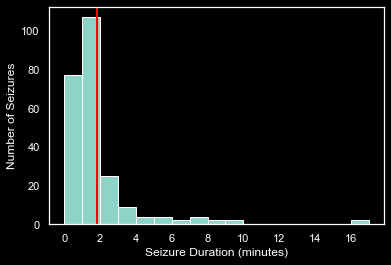

Seizures per subject:
count    32.000000
mean      7.437500
std       6.174545
min       1.000000
25%       3.000000
50%       5.000000
75%       8.500000
max      26.000000
dtype: float64


<AxesSubplot:ylabel='Frequency'>

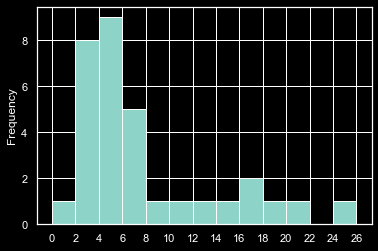

In [404]:
# Read in seizure metadata
import pandas as pd
import matplotlib.pyplot as plt

ictal_metadata = pd.read_csv('/Users/mjaskir/ngg/rotations/davis/iEEG_fMRI_WM/outputs/ieeg_car/time_windows/ictal_time_windows.csv')

# Add a new variable called 'duration' that is the difference between the start and end times
ictal_metadata['duration'] = (ictal_metadata['end'] - ictal_metadata['start'])/60

# Print row of dataframe with max duration
print(ictal_metadata[ictal_metadata['duration'] == ictal_metadata['duration'].max()])
print('==================================================')

included_subjects = [
'sub-RID0037', 'sub-RID0490', 'sub-RID0031', 'sub-RID0658', 'sub-RID0143',
'sub-RID0520', 'sub-RID0529', 'sub-RID0117', 'sub-RID0572', 'sub-RID0566',
'sub-RID0194', 'sub-RID0309', 'sub-RID0365', 'sub-RID0502', 'sub-RID0440',
'sub-RID0459', 'sub-RID0051', 'sub-RID0652', 'sub-RID0032', 'sub-RID0583',
'sub-RID0320', 'sub-RID0522', 'sub-RID0536', 'sub-RID0139', 'sub-RID0596',
'sub-RID0508', 'sub-RID0278', 'sub-RID0420', 'sub-RID0679', 'sub-RID0646',
'sub-RID0648', 'sub-RID0089'
]

# Filter the metadata to only include the included subjects
ictal_metadata = ictal_metadata[ictal_metadata['Patient'].isin(included_subjects)]

# Print the distribution of durations
print('Seizure duration in seconds:')
print(ictal_metadata['duration'].describe())

# Plot a density plot of duration, removing grid lines
ictal_metadata['duration'].plot(kind='hist', bins=range(0, 18, 1), xticks=range(0, 18, 2), grid=False)
plt.xlabel('Seizure Duration (minutes)')
plt.ylabel('Number of Seizures')

# Add vertical line at mean
plt.axvline(ictal_metadata['duration'].mean(), color='red', linewidth=2)
print('Mean seizure duration: ' + str(ictal_metadata['duration'].mean()*60))

plt.show()

print('==================================================')

# Determine the number of seizures per patient
print('Seizures per subject:')
print(ictal_metadata.groupby('Patient').size().describe())

# Plot a histogram of the number of seizures per patient with a bin width of 2 and xtick step of 2
ictal_metadata.groupby('Patient').size().plot(kind='hist', bins=range(0, 28, 2), xticks=range(0, 28, 2))